* `v0`の変化による渋滞の先頭の様子を見る

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_xmin import ds2s_OV_xmin
from lib.funcs import *

In [39]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_xmin(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.5,
		x_min=0.1,
		dt=1.0,
		dx=1.0,
		x_init=np.array([0.1 * i for i in range(K)], dtype=np.float64),
		n_max=10010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {
		label: flow
			for label, flow in [(
					"{} {}".format(1000*i, 1000*i+100),
	 				model.flow(1000*i, 1000*i+100)
				) for i in range(10)]
	}
	data[id] = js

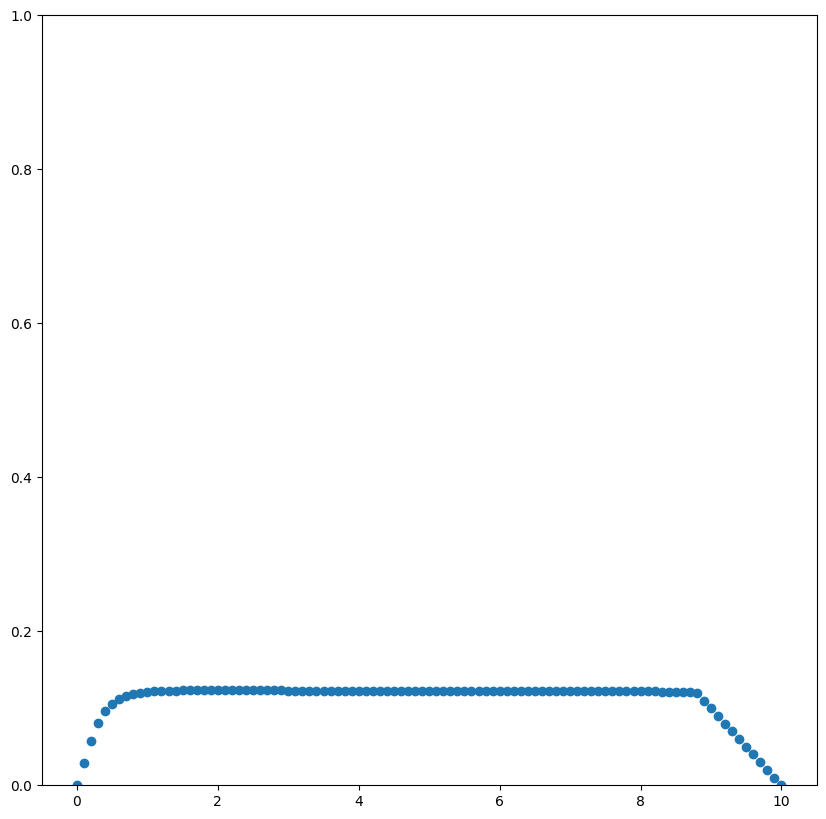

In [41]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["9000 9100"] for js in data.values()]
plt.figure(figsize=(10, 10))
plt.ylim((0, 1.0))
plt.scatter(density, flow)